In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv('probs.csv', sep = ';', encoding = 'latin-1')

In [3]:
df.tail(3)

LOCAL                  VISITA    GL    EM    GV
237        O'Higgins (Chile)       Palestino (Chile)  0.43  0.26  0.31
238      U.La Calera (Chile)  Audax Italiano (Chile)  0.43  0.25  0.32
239  U.de Concepción (Chile)  Coquimbo Unido (Chile)  0.36  0.31  0.34

In [4]:
df_equipos = pd.read_csv('tabla_equipos_actual.csv', sep = ';', encoding = 'latin-1')
equipos = list(df_equipos['EQUIPO'])
equipos

['U.Católica (Chile)',
 'Colo Colo (Chile)',
 'Palestino (Chile)',
 'Audax Italiano (Chile)',
 "O'Higgins (Chile)",
 'Huachipato (Chile)',
 'Coquimbo Unido (Chile)',
 'U.La Calera (Chile)',
 'U.Española (Chile)',
 'Cobresal (Chile)',
 'Curicó Unido (Chile)',
 'Everton (Chile)',
 'Iquique (Chile)',
 'Antofagasta (Chile)',
 'U.de Chile (Chile)',
 'U.de Concepción (Chile)']

In [5]:
def suma_puntos(row):
    indice_local = equipos.index(row['LOCAL'])
    indice_visita = equipos.index(row['VISITA'])
    if row['r_uniform'] <= row['GL']:
        puntajes[indice_local] += 3
    elif row['r_uniform'] >= 1 - row['GV']:
        puntajes[indice_visita] += 3
    else:
        puntajes[indice_local] += 1
        puntajes[indice_visita] += 1

In [6]:
n_iter = 10000
puntajes_guardados = []
posiciones_guardadas = []
for i in range(n_iter):
    puntajes = [0] * len(equipos)
    df['r_uniform'] = np.random.uniform(low=0.0, high=1.0, size=240)
    df.apply(suma_puntos, axis=1)
    puntajes_guardados.append(puntajes)
    
    s = pd.Series(puntajes)
    posiciones = list(s.rank(method='first', ascending = False))
    posiciones_guardadas.append(posiciones)

In [7]:
puntajes_guardados_df = pd.DataFrame(puntajes_guardados, columns = equipos)

In [8]:
puntajes_guardados_df.tail(3)

U.Católica (Chile)  Colo Colo (Chile)  Palestino (Chile)  \
9997                  69                 43                 42   
9998                  64                 41                 41   
9999                  62                 49                 46   

      Audax Italiano (Chile)  O'Higgins (Chile)  Huachipato (Chile)  \
9997                      42                 44                  49   
9998                      43                 48                  46   
9999                      42                 52                  47   

      Coquimbo Unido (Chile)  U.La Calera (Chile)  U.Española (Chile)  \
9997                      39                   40                  42   
9998                      43                   43                  38   
9999                      43                   41                  42   

      Cobresal (Chile)  Curicó Unido (Chile)  Everton (Chile)  \
9997                35                    37               44   
9998                40                    41               35   
9999                36                    42               28   

      Iquique (Chile)  Antofagasta (Chile)  U.de Chile (Chile)  \
9997               34                   41                  31   
9998               34                   33                  29   
9999               28                   33                  32   

      U.de Concepción (Chile)  
9997                       24  
9998                       31  
9999                       25

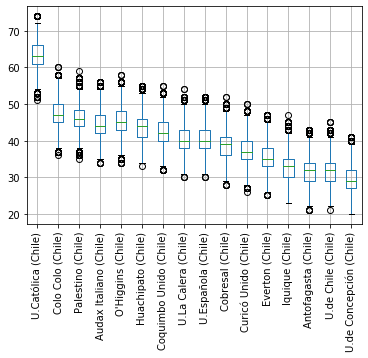

In [18]:
boxplot = puntajes_guardados_df.boxplot(rot=90)

In [10]:
posiciones_guardadas_df = pd.DataFrame(posiciones_guardadas, columns = equipos)

In [11]:
posiciones_guardadas_df.tail(3)

U.Católica (Chile)  Colo Colo (Chile)  Palestino (Chile)  \
9997                 1.0                5.0                6.0   
9998                 1.0                7.0                8.0   
9999                 1.0                3.0                5.0   

      Audax Italiano (Chile)  O'Higgins (Chile)  Huachipato (Chile)  \
9997                     7.0                3.0                 2.0   
9998                     4.0                2.0                 3.0   
9999                     7.0                2.0                 4.0   

      Coquimbo Unido (Chile)  U.La Calera (Chile)  U.Española (Chile)  \
9997                    11.0                 10.0                 8.0   
9998                     5.0                  6.0                11.0   
9999                     6.0                 10.0                 8.0   

      Cobresal (Chile)  Curicó Unido (Chile)  Everton (Chile)  \
9997              13.0                  12.0              4.0   
9998              10.0                   9.0             12.0   
9999              11.0                   9.0             14.0   

      Iquique (Chile)  Antofagasta (Chile)  U.de Chile (Chile)  \
9997             14.0                  9.0                15.0   
9998             13.0                 14.0                16.0   
9999             15.0                 12.0                13.0   

      U.de Concepción (Chile)  
9997                     16.0  
9998                     15.0  
9999                     16.0

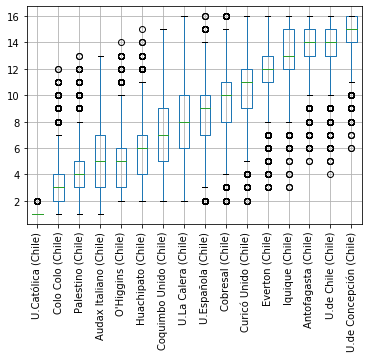

In [12]:
boxplot2 = posiciones_guardadas_df.boxplot(rot=90)

In [13]:
df2 = pd.DataFrame(np.zeros((len(equipos), len(equipos))),columns=equipos)
df2.index = range(1,1+len(equipos))

In [14]:
df2.head()

U.Católica (Chile)  Colo Colo (Chile)  Palestino (Chile)  \
1                 0.0                0.0                0.0   
2                 0.0                0.0                0.0   
3                 0.0                0.0                0.0   
4                 0.0                0.0                0.0   
5                 0.0                0.0                0.0   

   Audax Italiano (Chile)  O'Higgins (Chile)  Huachipato (Chile)  \
1                     0.0                0.0                 0.0   
2                     0.0                0.0                 0.0   
3                     0.0                0.0                 0.0   
4                     0.0                0.0                 0.0   
5                     0.0                0.0                 0.0   

   Coquimbo Unido (Chile)  U.La Calera (Chile)  U.Española (Chile)  \
1                     0.0                  0.0                 0.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  0.0                 0.0   
4                     0.0                  0.0                 0.0   
5                     0.0                  0.0                 0.0   

   Cobresal (Chile)  Curicó Unido (Chile)  Everton (Chile)  Iquique (Chile)  \
1               0.0                   0.0              0.0              0.0   
2               0.0                   0.0              0.0              0.0   
3               0.0                   0.0              0.0              0.0   
4               0.0                   0.0              0.0              0.0   
5               0.0                   0.0              0.0              0.0   

   Antofagasta (Chile)  U.de Chile (Chile)  U.de Concepción (Chile)  
1                  0.0                 0.0                      0.0  
2                  0.0                 0.0                      0.0  
3                  0.0                 0.0                      0.0  
4                  0.0                 0.0                      0.0  
5                  0.0                 0.0                      0.0

In [15]:
for index, row in posiciones_guardadas_df.iterrows():
    for equipo in list(df2.columns):
        print(equipo)
        df2.at[int(row[equipo]), equipo] += 1

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción

Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Catól

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Col

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (

U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano 

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Españo

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo U

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato 

U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (

Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chil

Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción

O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Caler

U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chil

Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)
Antofagasta (Chile)
U.de Chile (Chile)
U.de Concepción (Chile)
U.Católica (Chile)
Colo Colo (Chile)
Palestino (Chile)
Audax Italiano (Chile)
O'Higgins (Chile)
Huachipato (Chile)
Coquimbo Unido (Chile)
U.La Calera (Chile)
U.Española (Chile)
Cobresal (Chile)
Curicó Unido (Chile)
Everton (Chile)
Iquique (Chile)


In [16]:
df2

U.Católica (Chile)  Colo Colo (Chile)  Palestino (Chile)  \
1               9984.0               13.0                2.0   
2                 16.0             3845.0             2150.0   
3                  0.0             2287.0             2265.0   
4                  0.0             1417.0             1792.0   
5                  0.0             1029.0             1403.0   
6                  0.0              608.0             1015.0   
7                  0.0              403.0              655.0   
8                  0.0              214.0              348.0   
9                  0.0              118.0              212.0   
10                 0.0               50.0              100.0   
11                 0.0               14.0               47.0   
12                 0.0                2.0                9.0   
13                 0.0                0.0                2.0   
14                 0.0                0.0                0.0   
15                 0.0                0.0                0.0   
16                 0.0                0.0                0.0   

    Audax Italiano (Chile)  O'Higgins (Chile)  Huachipato (Chile)  \
1                      1.0                0.0                 0.0   
2                   1051.0             1560.0               752.0   
3                   1479.0             1654.0              1030.0   
4                   1691.0             1640.0              1333.0   
5                   1556.0             1544.0              1563.0   
6                   1346.0             1327.0              1551.0   
7                   1118.0              947.0              1319.0   
8                    725.0              596.0              1053.0   
9                    546.0              379.0               698.0   
10                   303.0              223.0               379.0   
11                   119.0               92.0               207.0   
12                    51.0               26.0                95.0   
13                    14.0               11.0                16.0   
14                     0.0                1.0                 3.0   
15                     0.0                0.0                 1.0   
16                     0.0                0.0                 0.0   

    Coquimbo Unido (Chile)  U.La Calera (Chile)  U.Española (Chile)  \
1                      0.0                  0.0                 0.0   
2                    366.0                120.0               102.0   
3                    632.0                280.0               246.0   
4                    926.0                498.0               397.0   
5                   1143.0                650.0               591.0   
6                   1409.0                978.0               831.0   
7                   1538.0               1274.0              1151.0   
8                   1391.0               1632.0              1478.0   
9                   1088.0               1566.0              1629.0   
10                   807.0               1338.0              1482.0   
11                   435.0                875.0              1058.0   
12                   184.0                475.0               611.0   
13                    65.0                210.0               309.0   
14                    15.0                 82.0                92.0   
15                     1.0                 17.0                20.0   
16                     0.0                  5.0                 3.0   

    Cobresal (Chile)  Curicó Unido (Chile)  Everton (Chile)  Iquique (Chile)  \
1                0.0                   0.0              0.0              0.0   
2               31.0                   7.0              0.0              0.0   
3               89.0                  26.0              9.0              3.0   
4              212.0                  64.0             26.0              3.0   
5              324.0                 141.0             47.0              3.0   
6              552.0                 243.0           

In [17]:
df2.to_csv('matriz_resultados.csv', sep = ';', encoding = 'latin-1')